# implementation of the naive exact matching algorithm

In [8]:
def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

### function that takes a DNA string and returns its reverse complement

In [9]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N': 'N'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t

### function that parses a DNA reference genome from a file in the FASTA format

In [10]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

### function that parses the read and quality strings from a FASTQ file containing sequencing reads

In [11]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline()  # skip name line
            seq = fh.readline().rstrip()  # read base sequence
            fh.readline()  # skip placeholder line
            qual = fh.readline().rstrip() # base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

#### now one can implement naive exact matching algorithm that is strand-aware. (RC stads now for the reverse complement)

In [5]:
#from reversecomp import *
#from naive import *

def naive(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                match = False
                break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences


In [12]:
def naive_with_rc(p,t):
    occur_for = naive(p,t)
    occur_rev = naive(reverseComplement(p),t)
    occurrences = []
    for i in occur_for:
        if i not in occurrences:
            occurrences.append(i)
    for i in occur_rev:
        if i not in occurrences:
            occurrences.append(i)

    return(occurrences)

In [13]:
#Tests
p = 'CCC'
ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as
assert(naive_with_rc(p, t)) == [10,23]

p = 'CGCG'
t = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
assert(naive_with_rc(p, t)) == [10,24]

In [1]:
# now doenwnload and parse lambda genome for exrecise

!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2020-04-06 19:54:14--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net... 13.224.89.191, 13.224.89.79, 13.224.89.30, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|13.224.89.191|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: 'lambda_virus.fa.1'

lambda_virus.fa.1   100%[=====================>]  48.12K  --.-KB/s   in 0.04s  

2020-04-06 19:54:14 (1.17 MB/s) - 'lambda_virus.fa.1' saved [49270/49270]



In [24]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome

In [25]:
# 
lambda_genome = readGenome('lambda_virus.fa')

In [30]:
occurrences = naive_with_rc('AGGT', lambda_genome)
#print(occurrences)
print('# occurrences: %d' % len(occurrences))

# occurrences: 306


In [31]:
occurrences = naive_with_rc('TTAA', lambda_genome)
#print(occurrences)
print('# occurrences: %d' % len(occurrences))

# occurrences: 195


In [32]:
occurrences = naive_with_rc('ACTAAGT', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 26028


In [33]:
occurrences = naive_with_rc('AGTCGA', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 450


In [35]:
#Naive pattern matching with indexes of up to 2 mismatches

def naive_2mm(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):  # loop over alignments
        mismatches = 0
        match = True
        for j in range(len(p)):  # loop over characters
            if t[i+j] != p[j]:  # compare characters
                if mismatches < 2:
                    mismatches += 1
                else:
                    match = False
                    break
        if match:
            occurrences.append(i)  # all chars matched; record
    return occurrences

In [36]:
occurrences = naive_2mm('TTCAAGCC', lambda_genome)
#print(occurrences)
print('# occurrences: %d' % len(occurrences))

# occurrences: 191


In [37]:
occurrences = naive_2mm('AGGAGGTT', lambda_genome)
print('offset of leftmost occurrence: %d' % min(occurrences))

offset of leftmost occurrence: 49


In [38]:
# now download human genome and test same functions 


!wget --no-check https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

--2020-04-06 20:27:32--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net... 13.224.89.208, 13.224.89.191, 13.224.89.79, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net|13.224.89.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: 'ERR037900_1.first1000.fastq'

ERR037900_1.first10 100%[=====================>] 235.96K  1007KB/s   in 0.2s   

2020-04-06 20:27:33 (1007 KB/s) - 'ERR037900_1.first1000.fastq' saved [241626/241626]



In [39]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open (filename) as fh:
        while True:
            fh.readline()
            seq = fh.readline().rstrip()
            fh.readline()
            qual = fh.readline().rstrip()
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

In [48]:
human_reads, qualities = readFastq('ERR037900_1.first1000.fastq')
# print(human_reads, qualities)

In [43]:
def phred33ToQ(qualities):
    return ord(qualities) - 33

In [50]:
def createHist(qualities):
    hist = [0] * 100
    for qualities in qualities:
        for phred in qualities:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(qualities)
print(h)

[0, 0, 17723, 0, 2, 11, 11, 28, 23, 55, 100, 111, 86, 174, 185, 272, 317, 259, 390, 1523, 2782, 762, 286, 413, 403, 538, 351, 694, 971, 777, 1024, 1449, 1341, 1312, 1916, 2233, 3025, 4043, 6640, 45696, 2074, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


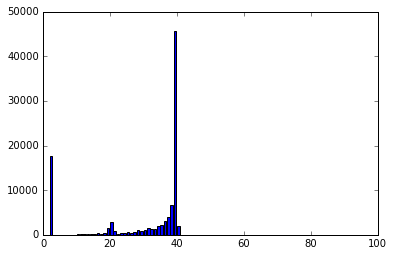

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)),h)
plt.show()

In [49]:
def findGCbyPos(reads):
    gc = [0] * 100
    totals = [0] * 100
    
    for read in reads:
        for i in range(len(read)):
            if read[i] == 'C' or read[i] == 'G':
                gc[i] += 1
            totals[i] += 1
    for i in range(len(gc)):
        if totals[i] > 0:
            gc[i]/ float(totals[i]):
    return gc
gc = findGCByPos(human_reads)
print(gc)

plt.plot(range(len(gc)), gc)
plt.show()

SyntaxError: invalid syntax (<ipython-input-49-4b620f997db4>, line 12)